Project 2

Start date: March 4 2025

Exploratory Data Analysis

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [172]:
## Load data
df = pd.read_csv('data/term-deposit-marketing-2020.csv')

In [173]:
print("Dataset Shape:", df.shape)

Dataset Shape: (40000, 14)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [174]:
## Statistics (including categorical data)
## For categorical data: The top is the most common value. The freq is the most common value’s frequency. 
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [71]:
df[df['balance']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
25,44,admin,married,secondary,no,-372,yes,no,unknown,5,may,172,1,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,no
45,36,admin,single,primary,no,-171,yes,no,unknown,5,may,242,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39347,24,services,single,secondary,yes,-1414,yes,yes,cellular,18,may,171,2,no
39349,37,blue-collar,married,unknown,no,-118,yes,no,cellular,18,may,21,2,no
39528,40,blue-collar,married,primary,no,-310,yes,yes,cellular,26,may,133,2,no
39674,58,retired,married,primary,yes,-235,no,yes,telephone,27,may,93,2,no


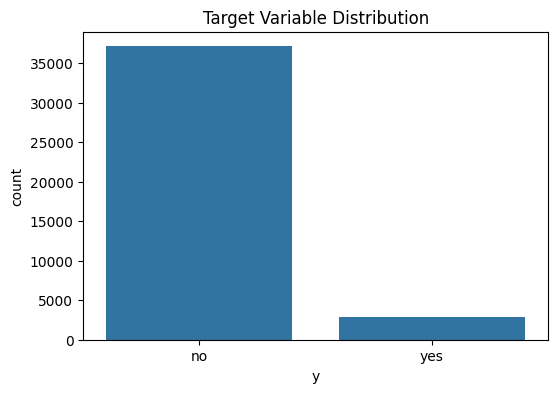

In [72]:
# Visualizing target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["y"])
plt.title("Target Variable Distribution")
plt.show()

In [73]:
print('Said no: ', (37104/40000)*100)
print('Said yes: ', ((40000-37104)/40000)*100)

## Counts
df['y'].value_counts()

Said no:  92.75999999999999
Said yes:  7.24


y
no     37104
yes     2896
Name: count, dtype: int64

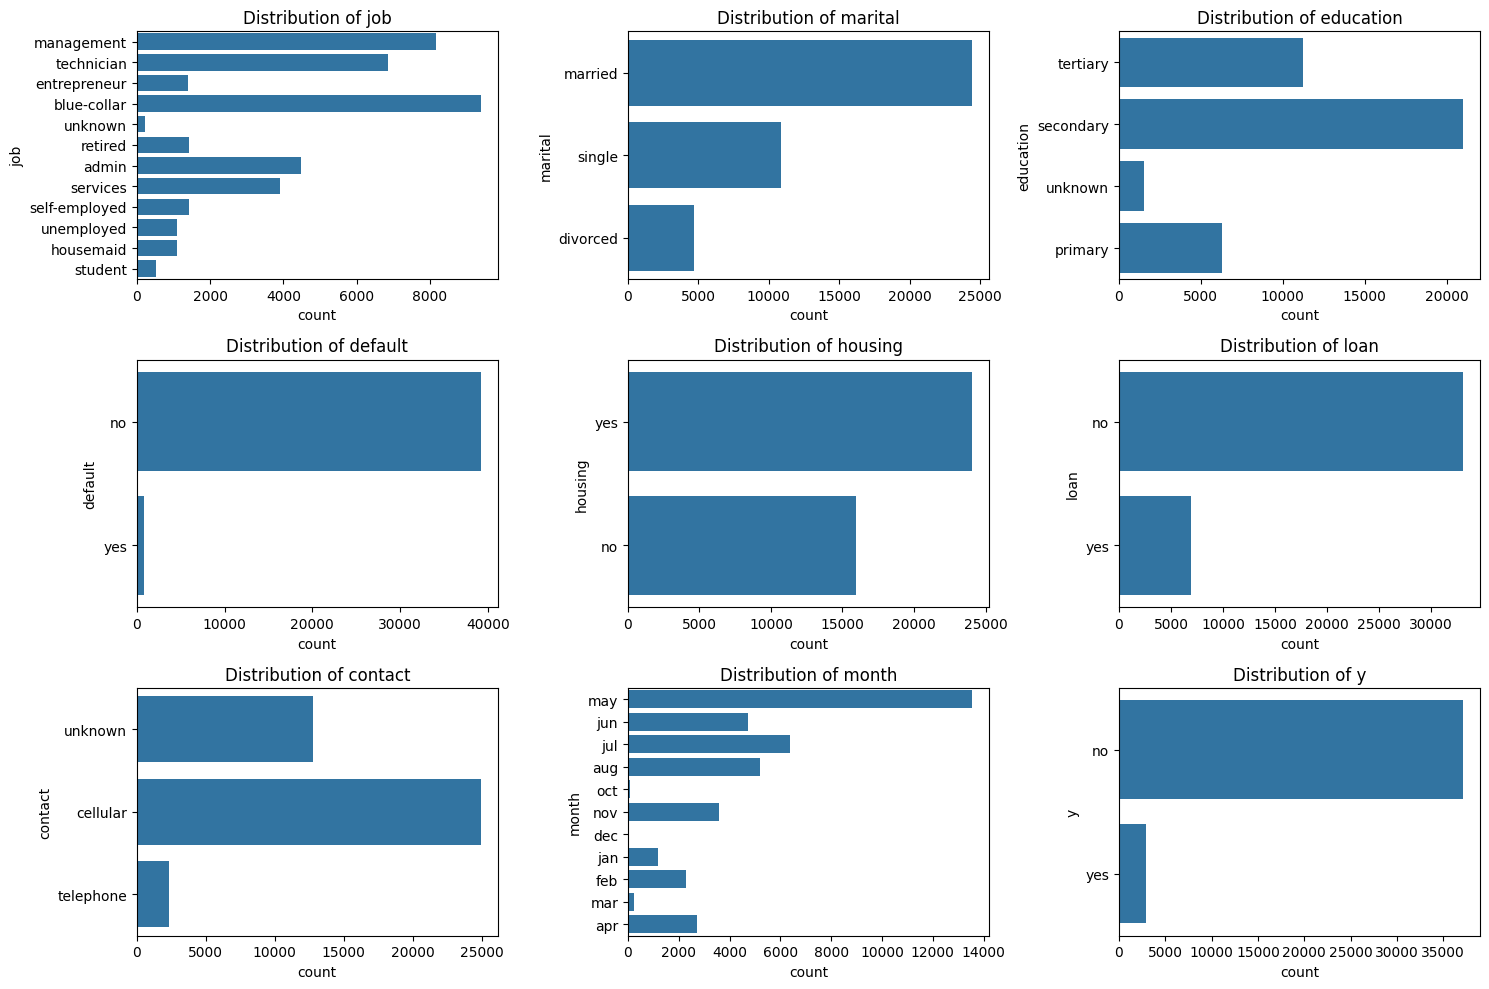

In [74]:
# Categorical variable distributions
categorical_features = df.select_dtypes(include=["object", "category"]).columns
num_categories = len(categorical_features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(y=df[col], ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

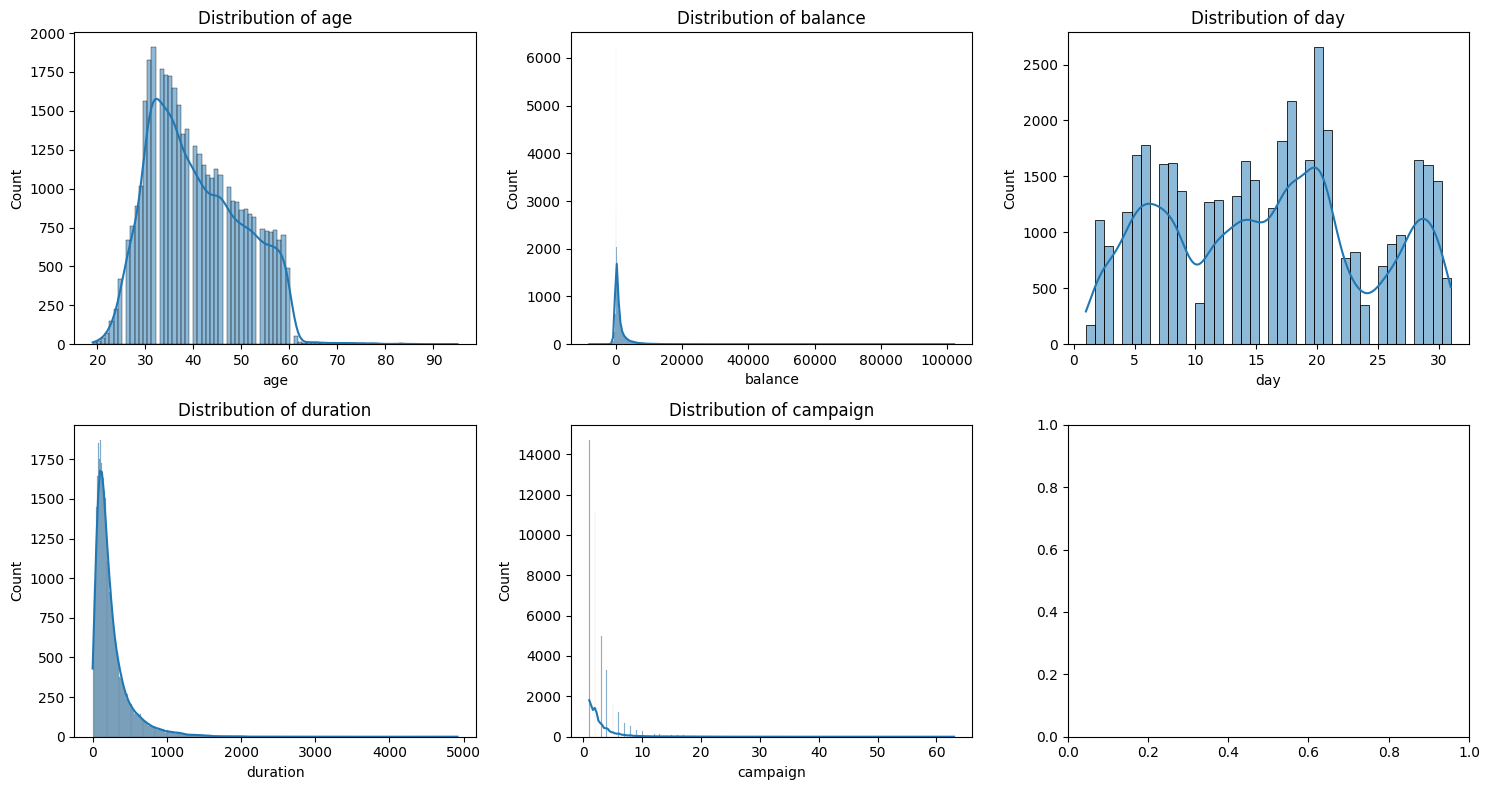

In [75]:
# Numerical variable distributions
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
num_numerical_features = len(numerical_features)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    if i < len(axes):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

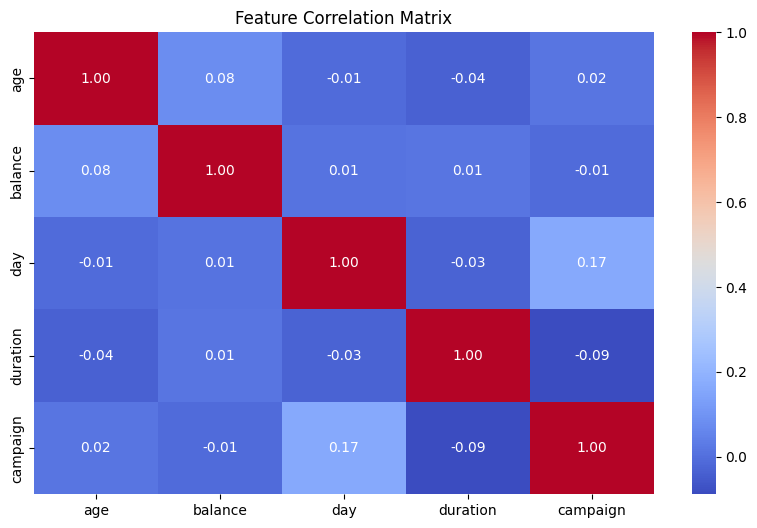

In [76]:
# Correlation heatmap
numeric_df = df.select_dtypes(['int64','float64']).copy()
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

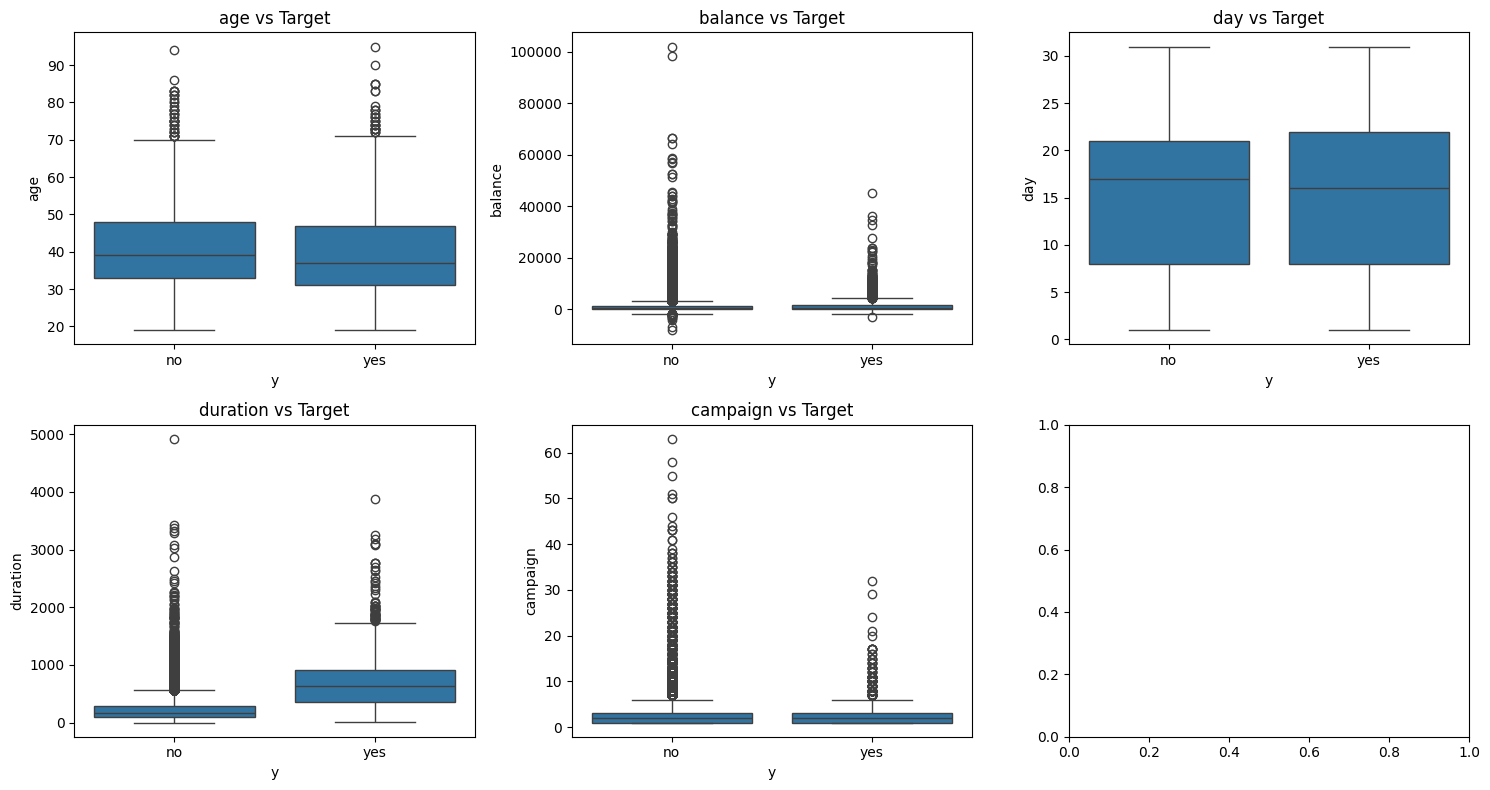

In [77]:
# Relationship between numerical features and target variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    if i < len(axes):
        sns.boxplot(x=df["y"], y=df[col], ax=axes[i])  # Replace 'target' with actual column name
        axes[i].set_title(f"{col} vs Target")
plt.tight_layout()
plt.show()

We can see the outlier ranges for each feature.
Duration: for calls that said yes, the duration is higher.

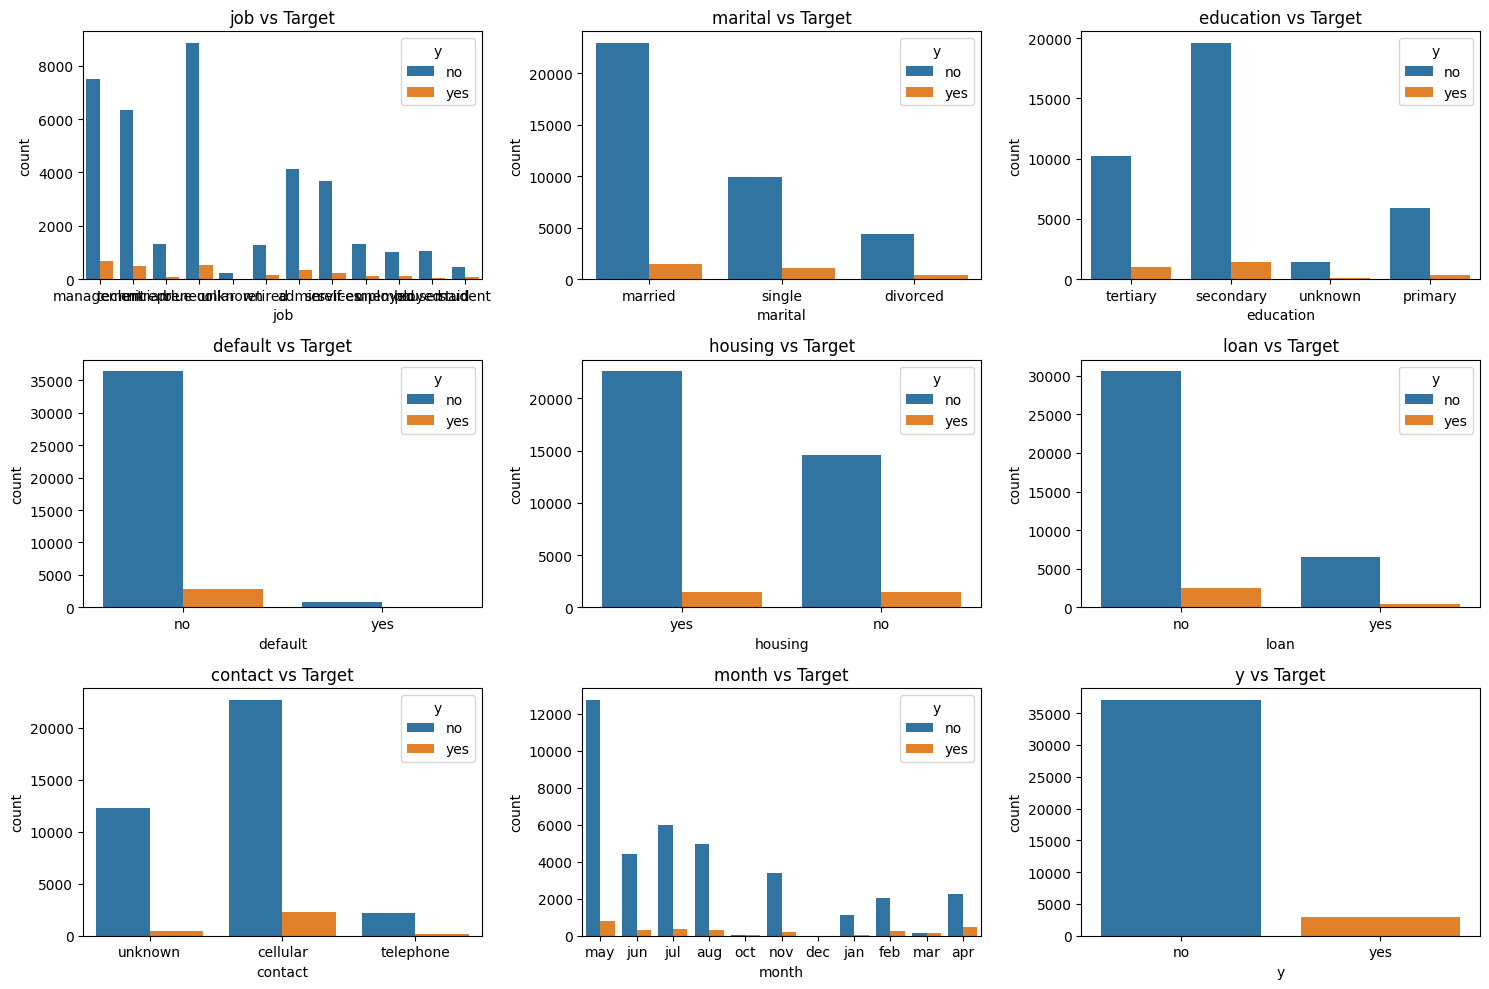

In [78]:
# Relationship between categorical features and target variable
num_categories = len(categorical_features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(x=df[col], hue=df["y"], ax=axes[i])  # Replace 'target' with actual column name
        #sns.catplot(data=df, x=col, y="age", hue="y", kind="box")
        #sns.boxplot(data=df, x=col, y=df[col], hue="y", ax=axes[i])
        axes[i].set_title(f"{col} vs Target")
        #axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

Most 'yes' calls were made during months of May and April.

Multilayered ML

They have made 40000 calls and most of them have said no. Can we eliminate unwanted calls?

Model 1
Before making calls, eliminate unwanted customers (no call related features. Only use demographic and financial features because we haven't made any calls yet.)
This helps filter data. Should we use recall? 
We should not MISS any customers that might say yes because that error will trickle down to the next layer. That means higher recall.

MODEL 2
Using filtered data, train the next model.
Which of the customers we should KEEP calling (using all features)

We should strike a balance between recall and precision.

Look at 'Campaign' feature. The minimum is 1 and maximum is 63. So they have called someone 63 times! 
Look more into this feature. Number of times vs rate of saying yes/no?


In [164]:
# Adding a field where the target is mapped to an integer to count the values
df['y_int'] = df['y'].map({'yes':1, 'no':0})

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,y_int
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,0


In [160]:
# Groupd data by given field and compute rate of saying 'yes'
def group_data(df, groupby_col):
    # Ensure both 'yes' and 'no' columns exist
    grouped_df = df.groupby(groupby_col)['y'].value_counts().unstack(fill_value=0)

    # Add missing columns if necessary
    if 'no' not in grouped_df:
        grouped_df['no'] = 0
    if 'yes' not in grouped_df:
        grouped_df['yes'] = 0

    # Rename columns for clarity
    grouped_df = grouped_df.rename(columns={'no': 'no_count', 'yes': 'yes_count'})

    # Compute the rate of saying "yes"
    grouped_df['yes_rate'] = grouped_df['yes_count'] / (grouped_df['no_count'] + grouped_df['yes_count'])
    #grouped_df['yes_rate'] = grouped_df['yes_count'] / grouped_df['no_count']


    #nanIdx = grouped_df[grouped_df.isna().any(axis=1)].index
    #print(nanIdx)
    grouped_df.fillna(0, inplace=True)
    # Reset index for better readability
    grouped_df.reset_index(inplace=True)

    # Display the processed DataFrame
    #grouped_df.head(50)

    return grouped_df

def plot_groups(grouped_df, groupby_col):

    # Set figure size
    fig, ax1 = plt.subplots(figsize=(10, 3))

    # Bar plot for yes_count and no_count
    bar_width = 0.4
    unique_values = grouped_df[groupby_col].unique()
    x = np.arange(len(unique_values))
    ax1.bar(x - bar_width/2, grouped_df['no_count'], width=bar_width, label='No Count', color='red')
    ax1.bar(x + bar_width/2, grouped_df['yes_count'], width=bar_width, label='Yes Count', color='blue')
    ax1.set_xlabel(groupby_col)
    ax1.set_ylabel('Count')
    ax1.set_xticks(x)
    ax1.set_xticklabels(grouped_df[groupby_col], rotation=45)
    ax1.legend(loc='upper left')

    # Twin axis for line plot of yes_rate
    ax2 = ax1.twinx()
    ax2.plot(x, grouped_df['yes_rate'], color='black', marker='o', linestyle='-', label='Yes Rate')
    ax2.set_ylabel('Yes Rate')
    ax2.set_ylim(0, 1)
    ax2.legend(loc='upper right')

    # Annotate yes_rate values on the plot
    for i, rate in enumerate(grouped_df['yes_rate']):
        ax2.text(x[i], rate, f'{rate:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Yes/No Counts and Yes Rate by {groupby_col}')
    plt.show()

# Define binning function
def bin_column(df, column, bin_width):
    df[column + '_binned'] = (df[column] // bin_width) * bin_width
    return df


C:\Users\bcwic\AppData\Local\Temp\ipykernel_21872\1633669666.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(groupby_col)['y'].value_counts().unstack(fill_value=0)


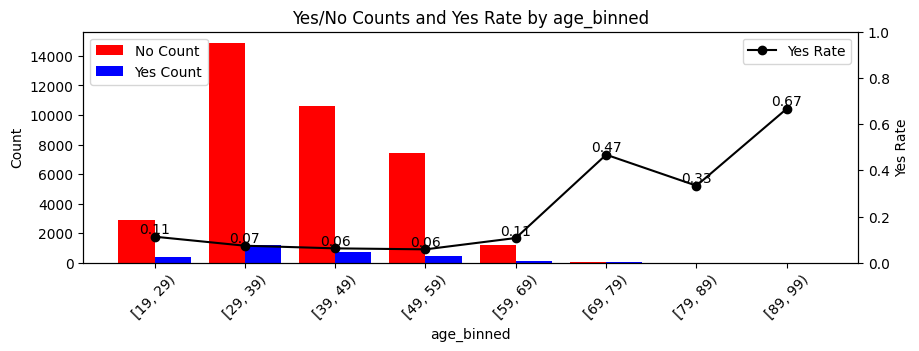

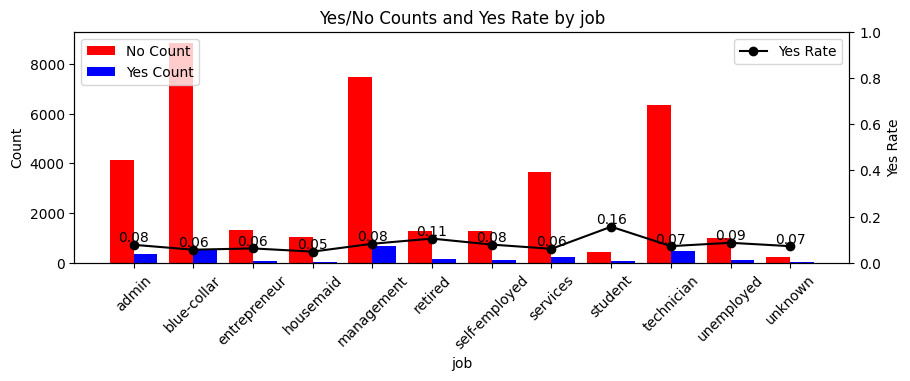

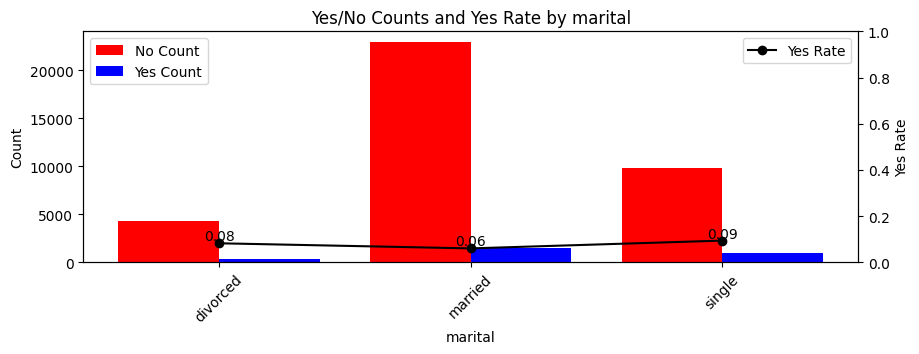

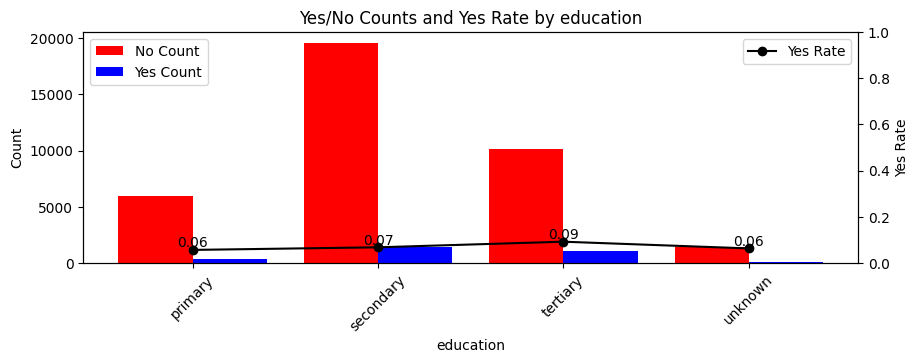

C:\Users\bcwic\AppData\Local\Temp\ipykernel_21872\1633669666.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(groupby_col)['y'].value_counts().unstack(fill_value=0)


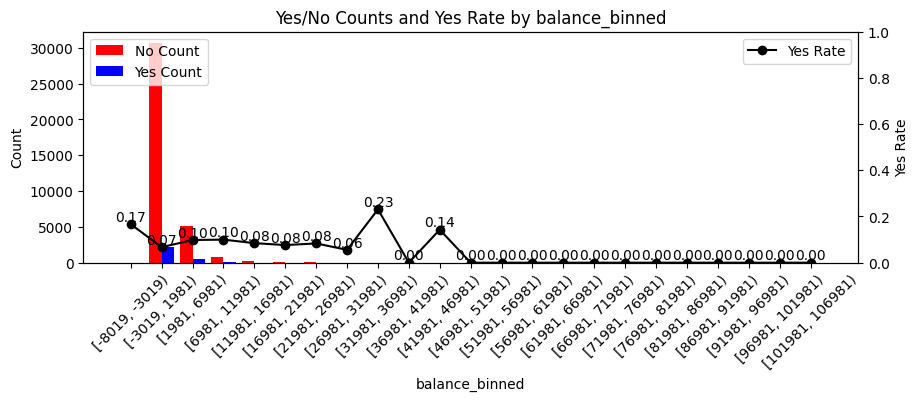

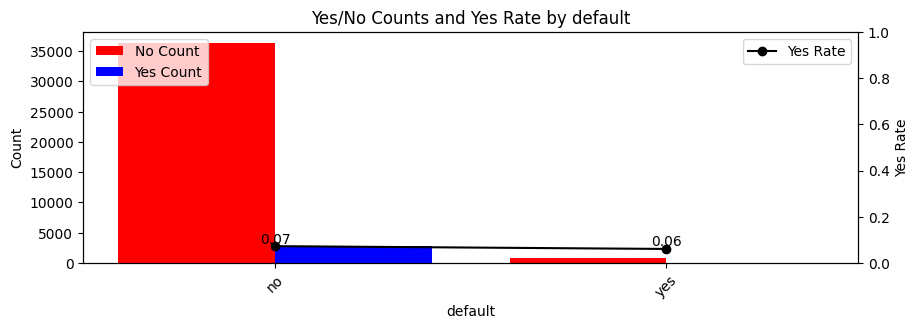

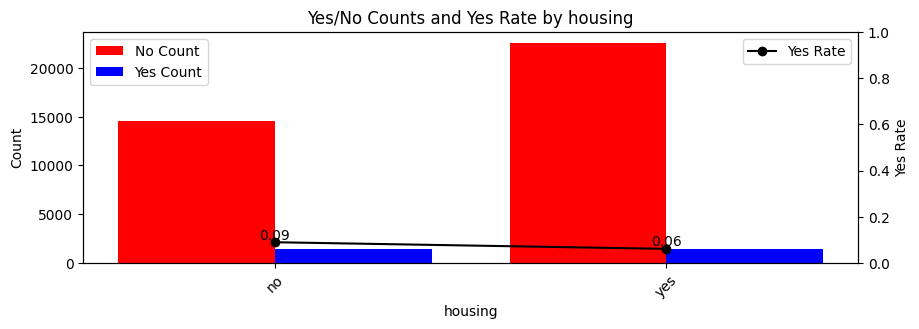

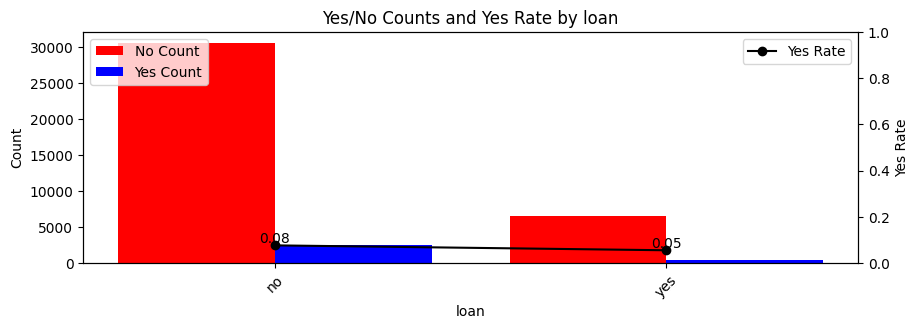

y,loan,no_count,yes_count,yes_rate
0,no,30554,2516,0.076081
1,yes,6550,380,0.054834


In [ ]:
# First analyze the demographic and financial information of customers first
# These are information we have before making any calls
demo_numerical = ['age_binned']
demo_categorical = ['job', 'marital', 'education']
finan_numerical = ['balance_binned']
finan_categorical = ['default', 'housing', 'loan']

df_copy = df.copy()
df_copy['age_binned'] = pd.cut(df_copy['age'], bins = np.arange(df_copy['age'].min(), df_copy['age'].max() + 10, 10), right=False)
df_copy['balance_binned'] = pd.cut(df_copy['balance'], bins = np.arange(df_copy['balance'].min(), df_copy['balance'].max() + 5000, 5000), right=False)

# Get the say-yes rate and plot it against above attributes
customer_attributes = demo_numerical + demo_categorical + finan_numerical + finan_categorical

for col in customer_attributes:
    grouped_df = group_data(df_copy, col)
    plot_groups(grouped_df, col)

#grouped_df


### Thoughts on the above analysis
Customers above age of 70 tend to say yes more than younger aged customers. However, from previous boxplots we can see that 70 and above are in the outlier range. That is, less number of order customers were reached out compared to the younger customer base. 
Should they focus on the older customer base? Example retired customers who may benefit from short-term deposits?
Look at yes rate vs jobs: Retired class has a relatively higher yes rate (but below students). This group is probably the same as 70 and above age group. Should we plot this? Not necessary because it is intuitive?
Why are students interested in short-term deposits? Students are also an outlier group. 

In [167]:
# Correlation between features and target variable
df[['age', 'balance']].corrwith(df['y_int'])

age       -0.020273
balance    0.030232
dtype: float64

Negative correlation means when one variable decreases, the other increases.
yes = 1, no = 0
So, negative correlation between age and y means when age decreases there are more 'yes'es?
Is this measure valid for a binary target?

### Ordinal feature encoding

In [177]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [178]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Drop the unnecessary column
#df.drop(columns=["Unnamed: 0"], inplace=True)

# Apply Label Encoding to binary categorical features
binary_features = ["default", "housing", "loan", "y"]
label_encoders = {}
for col in binary_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Apply One-Hot Encoding to multi-class categorical features
multi_class_features = ["job", "marital", "education", "contact", "month"]
df = pd.get_dummies(df, columns=multi_class_features, drop_first=True)

# Display the transformed dataset
df.head()



,age,default,balance,housing,loan,day,duration,campaign,y,job_blue-collar,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,261,1,0,False,...,False,False,False,False,False,False,False,True,False,False
1,44,0,29,1,0,5,151,1,0,False,...,False,False,False,False,False,False,False,True,False,False
2,33,0,2,1,1,5,76,1,0,False,...,False,False,False,False,False,False,False,True,False,False
3,47,0,1506,1,0,5,92,1,0,True,...,False,False,False,False,False,False,False,True,False,False
4,33,0,1,0,0,5,198,1,0,False,...,False,False,False,False,False,False,False,True,False,False
